CNN Example Using cifar-10 Dataset
Mark Guza

References:

https://www.youtube.com/watch?v=7HPwo4wnJeA&t=108s



In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Load the Dataset CIFAR-10

In [5]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

y_train is a 2D array, but we can simplify to 1D array for classification purposes!!!!!!

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
X_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [18]:
#List all Categories
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [19]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

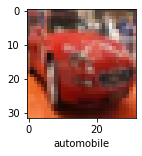

In [24]:
#Plot an example image from the dataset
plot_sample(X_train, y_train, 5)

In [25]:
#Normalize the training data 

X_train = X_train / 255.0
X_test = X_test / 255.0

Build a Simple Artificial Neural Network (ANN) to Classify the Images

In [26]:
#Build the ann network

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 51s 32ms/step - loss: 1.8117 - accuracy: 0.3563
Epoch 2/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.6266 - accuracy: 0.4241
Epoch 3/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.5447 - accuracy: 0.4560
Epoch 4/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4837 - accuracy: 0.4792
Epoch 5/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.4328 - accuracy: 0.4958


In [27]:
#Run some metrics 
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.64      0.51      1000
           1       0.57      0.58      0.57      1000
           2       0.49      0.16      0.24      1000
           3       0.34      0.45      0.38      1000
           4       0.50      0.34      0.41      1000
           5       0.50      0.25      0.33      1000
           6       0.45      0.65      0.53      1000
           7       0.64      0.43      0.52      1000
           8       0.43      0.74      0.54      1000
           9       0.56      0.44      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



Build A Convolutional Neural Network (CNN) to Classify the Images 

In [32]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4974 - accuracy: 0.4619
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1177 - accuracy: 0.6089
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9944 - accuracy: 0.6559
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9179 - accuracy: 0.6819
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8643 - accuracy: 0.6966
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8102 - accuracy: 0.7200
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7748 - accuracy: 0.7309
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7298 - accuracy: 0.7463
Epoch 9/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6949 - accuracy: 0.7578
Epoch 10/10
1563/1563 [==============================] - 29s 19m

In [33]:
#Run some metrics
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9095 - accuracy: 0.7061


[0.909492552280426, 0.7060999870300293]

In [39]:
#Look at the predicted values from the test set
y_pred = cnn.predict(X_test)
y_pred[:1]
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:1]

[3]

In [45]:
y_test[:3]

array([[3],
       [8],
       [8]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

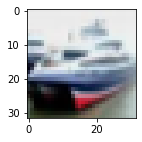

In [51]:
plot_sample(X_test, y_test,1)

In [50]:
classes[y_classes[1]]

'ship'